# Application de l'ACP sur le jeu de donneés de thegoodscents

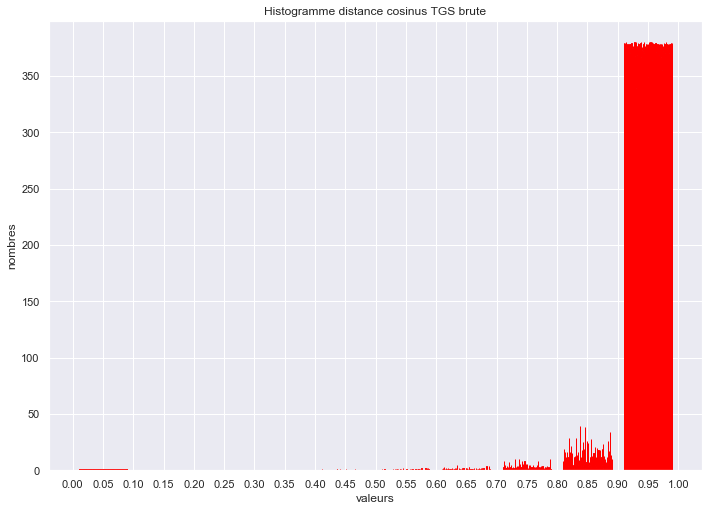

(381, 381)


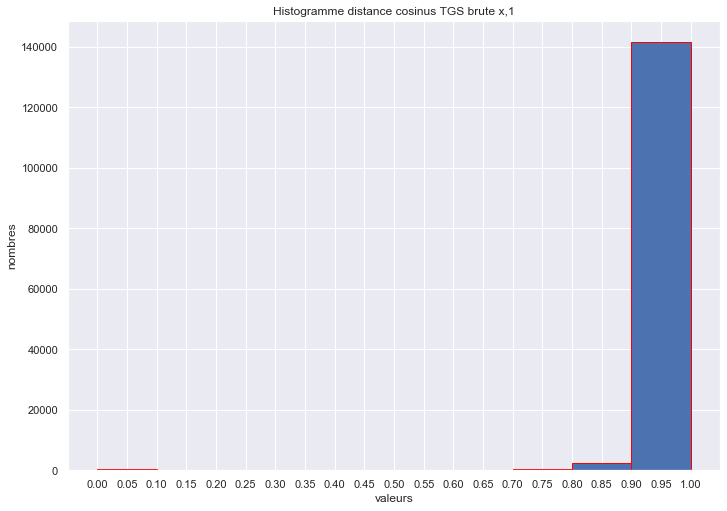

[0.         1.0086358  1.01488242 ... 1.0062968  0.99005529 0.        ]


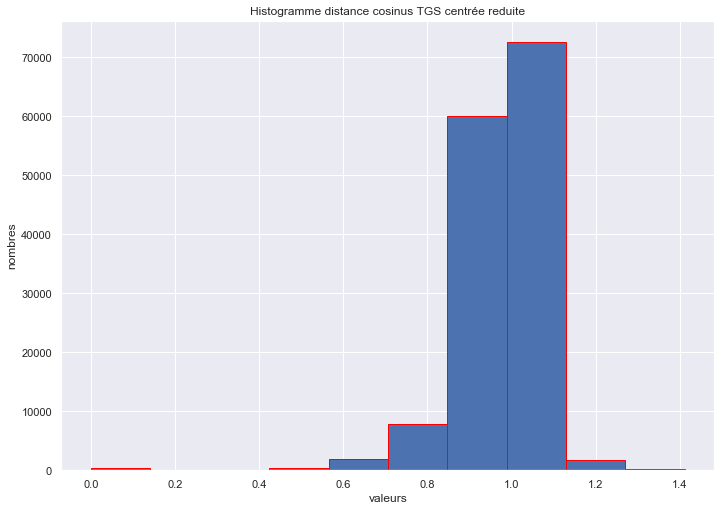

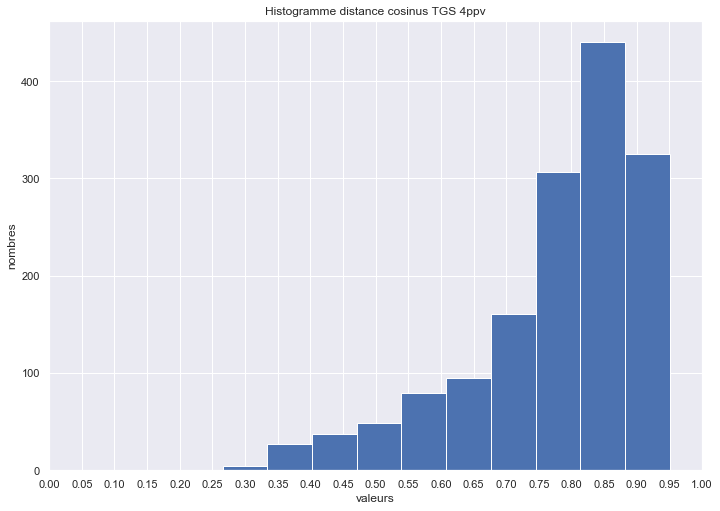

variance expliquer en fonction de l'axe
Eig val = 
[9.75247040e-02 4.78098821e-02 4.11551946e-02 3.62435367e-02
 3.16817611e-02 2.95728510e-02 2.43864145e-02 2.26679771e-02
 1.87926498e-02 1.70414920e-02 1.60916065e-02 1.52667876e-02
 1.48470267e-02 1.36892845e-02 1.34652845e-02 1.32715870e-02
 1.12754368e-02 1.07853183e-02 1.04008638e-02 9.79451698e-03
 9.39573886e-03 9.10919122e-03 8.72688704e-03 8.58454648e-03
 8.24452492e-03 7.89174652e-03 7.66816677e-03 7.47244676e-03
 7.27468720e-03 7.18254980e-03 6.90391884e-03 6.62641929e-03
 6.40143412e-03 6.30169908e-03 6.01082034e-03 5.87273011e-03
 5.66329240e-03 5.51814399e-03 5.49788554e-03 5.30045977e-03
 5.19967637e-03 5.03387305e-03 4.83777780e-03 4.73225389e-03
 4.68993622e-03 4.67862112e-03 4.59290950e-03 4.54713937e-03
 4.50902596e-03 4.40926162e-03 4.36024001e-03 4.31848439e-03
 4.23225410e-03 4.19235212e-03 4.14737442e-03 4.07780452e-03
 3.98140122e-03 3.81776997e-03 3.79766021e-03 3.70579541e-03
 3.69145498e-03 3.61896737e-03 3.5

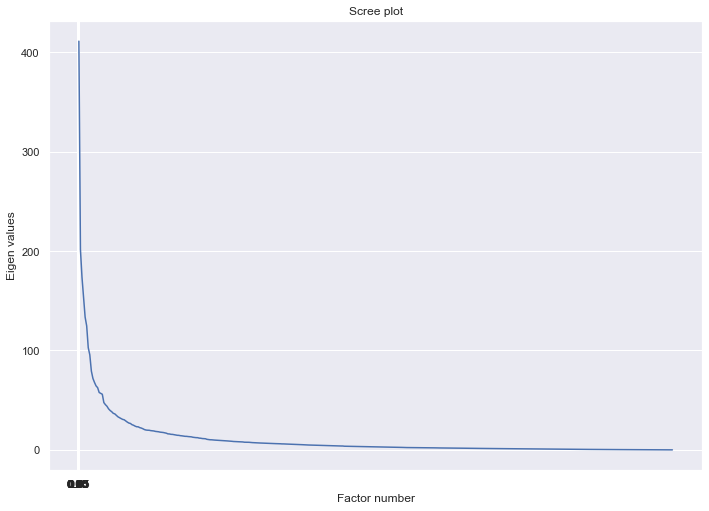

[[0.         1.0086358  1.01488242 ... 1.0156516  1.01701601 1.01300993]
 [1.0086358  0.         0.9497181  ... 0.95750027 0.96264431 1.0011715 ]
 [1.01488242 0.9497181  0.         ... 0.9030466  0.913987   0.99939528]
 ...
 [1.0156516  0.95750027 0.9030466  ... 0.         0.9276595  1.00156099]
 [1.01701601 0.96264431 0.913987   ... 0.9276595  0.         0.97136824]
 [1.01300993 1.0011715  0.99939528 ... 1.00156099 0.97136824 0.        ]]


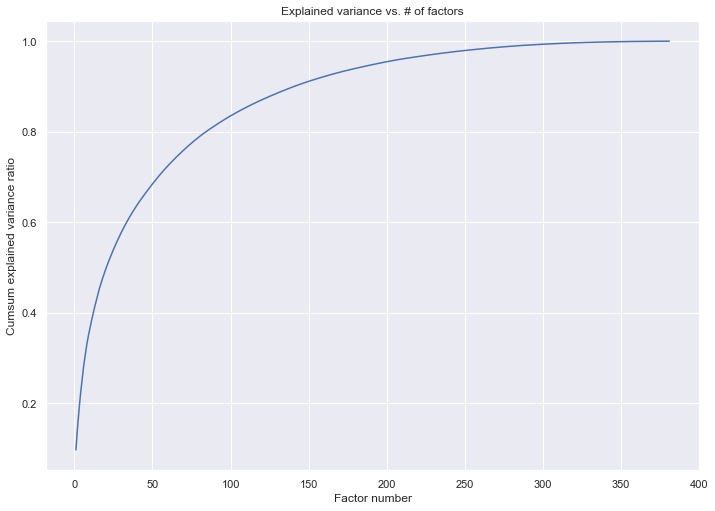

[t-SNE] Computing 61 nearest neighbors...
[t-SNE] Indexed 150 samples in 0.000s...
[t-SNE] Computed neighbors for 150 samples in 0.002s...
[t-SNE] Computed conditional probabilities for sample 150 / 150
[t-SNE] Mean sigma: 0.182240
[t-SNE] Computed conditional probabilities in 0.005s
[t-SNE] Iteration 50: error = 57.4592018, gradient norm = 0.6937818 (50 iterations in 0.046s)
[t-SNE] Iteration 100: error = 58.6208916, gradient norm = 0.2754974 (50 iterations in 0.041s)
[t-SNE] Iteration 150: error = 56.5623779, gradient norm = 0.4671757 (50 iterations in 0.043s)
[t-SNE] Iteration 200: error = 56.9611359, gradient norm = 0.3315226 (50 iterations in 0.041s)
[t-SNE] Iteration 250: error = 61.1353188, gradient norm = 0.4012044 (50 iterations in 0.044s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 61.135319
[t-SNE] Iteration 300: error = 0.9424267, gradient norm = 0.0329413 (50 iterations in 0.036s)
[t-SNE] Iteration 350: error = 0.8119484, gradient norm = 0.0015356 (

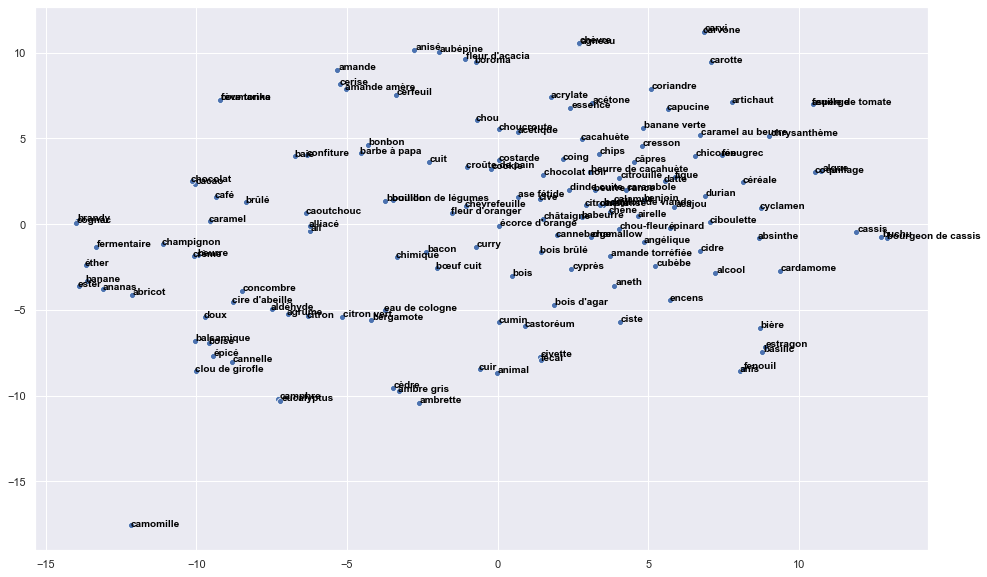

In [47]:
from sklearn.metrics.pairwise import cosine_distances
import pandas as pd
from sklearn.manifold import TSNE
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
X = pd.read_csv("datagoodscents.csv",header=0,index_col=0)

#print(X[:0])
index = 0
headerText = np.empty(X.shape[1], dtype=object)
for col in X.columns: 
    headerText[index] = col
    index+=1;
#print(headerText)
#dimension
#print(X.shape) # (4573, 381)
X = X.T
#nombre d'observations
n = X.shape[0]
#nombre de variables
p = X.shape[1]

import sklearn

### Distance cosinus TGS brute
plt.hist(cosine_distances(X),
            edgecolor = 'red')
plt.xlabel('valeurs')
plt.ylabel('nombres')
plt.xticks(mb1)
plt.title('Histogramme distance cosinus TGS brute')
plt.show()

mb1 = [0,0.05,0.1,0.15,0.20,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9,0.95,1]

# Distance cosinus TGS brute 
# Matrice 4573 * 381 
index_matrice_distance = 0
matrice_distance = np.empty([145161],dtype=float)

matrice_cosine_distance = cosine_distances(X)
print(matrice_cosine_distance.shape)

for row in matrice_cosine_distance:
    for index in row:
        matrice_distance[index_matrice_distance] = index
        index_matrice_distance+=1

plt.hist(np.trim_zeros(matrice_distance),
            edgecolor = 'red')
plt.xlabel('valeurs')
plt.ylabel('nombres')
plt.xticks(mb1)
plt.title('Histogramme distance cosinus TGS brute x,1')
plt.show()
#classe pour standardisation
from sklearn.preprocessing import StandardScaler
#instanciation
sc = StandardScaler()

#transformation – centrage-réduction
Z = sc.fit_transform(X)
dist_Cosine = cosine_distances(Z)

index_matrice_distance = 0
matrice_distance_reduite = np.empty([145161],dtype=float)
for row in dist_Cosine:
    for index in row:
        matrice_distance_reduite[index_matrice_distance] = index
        index_matrice_distance+=1
        
print(matrice_distance_reduite)
plt.hist(np.trim_zeros(matrice_distance_reduite),
            edgecolor = 'red')
plt.xlabel('valeurs')
plt.ylabel('nombres')
plt.title('Histogramme distance cosinus TGS centrée reduite')
plt.show()
kppv_distance = np.empty([145161],dtype=float)
index=0
for row in dist_Cosine:
    t = np.array(row)
    indices = t.argsort()
    indices = indices[t[indices] > 0]
    kppv_distance[index] = t[indices[0]]
    index+=1
    kppv_distance[index] = t[indices[1]]
    index+=1
    kppv_distance[index] = t[indices[2]]
    index+=1
    kppv_distance[index] = t[indices[3]]
    index+=1
    
plt.hist(np.trim_zeros(kppv_distance))
plt.xlabel('valeurs')
plt.ylabel('nombres')
plt.xticks(mb1)
plt.title('Histogramme distance cosinus TGS 4ppv')
plt.show()
#print(np.array(np.mat(cosine_distances(Z))).describe(include= 'all'))
#classe pour l'ACP
from sklearn.decomposition import PCA
#instanciation
acp = PCA(svd_solver='full')

#calculs
coord = acp.fit_transform(Z)
#nombre de composantes calculées
#print(acp.n_components_) # 381

#variance expliquée
print("variance expliquer en fonction de l'axe")
#print(acp.explained_variance_)

#valeur corrigée de la variance expliquée
eigval = (p-1)/p*acp.explained_variance_
print("Eig val = ")
#print(eigval)

#proportion de variance expliquée
print(acp.explained_variance_ratio_)
import matplotlib.pyplot as plt
import numpy
plt.plot(numpy.arange(1,n+1),eigval)
plt.title("Scree plot")
plt.ylabel("Eigen values")
plt.xticks(mb1)
plt.xlabel("Factor number")
plt.show()

sns.set(rc={'figure.figsize':(11.7,8.27)})
palette = sns.color_palette("bright", 10)

embed_mat = coord[:150]
embed_mat_cosine = cosine_distances(embed_mat)
print(embed_mat_cosine)

#cumul de variance expliquée
plt.plot(numpy.arange(1,n+1),numpy.cumsum(acp.explained_variance_ratio_))
plt.title("Explained variance vs. # of factors")
plt.ylabel("Cumsum explained variance ratio")
plt.xlabel("Factor number")
plt.show()


#positionnement des individus dans le premier plan
fig, axes = plt.subplots(figsize=(100,100))
axes.set_xlim(-50,50) #même limites en abscisse
axes.set_ylim(-50,50) #et en ordonnée
#placement des étiquettes des observations
for i in range(n):
    plt.annotate(X.index[i],(coord[i,0],coord[i,1]))
#ajouter les axes
plt.plot([-50,50],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-50,50],color='silver',linestyle='-',linewidth=1)
#affichage
plt.show()

tsne = TSNE(n_components=2,metric='precomputed',verbose=2,n_iter=2000,perplexity=20,early_exaggeration = 12,learning_rate=10)
X_embedded = tsne.fit_transform(embed_mat_cosine)


df_subset = {} 
df_subset['tsne-2d-one'] = X_embedded[:,0]
df_subset['tsne-2d-two'] = X_embedded[:,1]
plt.figure(figsize=(16,10))
p1 = sns.scatterplot(X_embedded[:,0], X_embedded[:,1], legend='full', palette=palette)
index = 0
for line in range(0,embed_mat_cosine.shape[0]):
    if index%2 == 0:
        decalage = 0.03
    else:
        decalage = -0.03
    p1.text(df_subset['tsne-2d-one'][line]+decalage, df_subset['tsne-2d-two'][line]+decalage, 
     headerText[line], horizontalalignment='left', size='small', color='black', weight='semibold')
    index+=1


variance expliquer en fonction de l'axe
Eig val = 
[9.75247040e-02 4.78098821e-02 4.11551946e-02 3.62435367e-02
 3.16817611e-02 2.95728510e-02 2.43864145e-02 2.26679771e-02
 1.87926498e-02 1.70414920e-02 1.60916065e-02 1.52667876e-02
 1.48470267e-02 1.36892845e-02 1.34652845e-02 1.32715870e-02
 1.12754368e-02 1.07853183e-02 1.04008638e-02 9.79451698e-03
 9.39573886e-03 9.10919122e-03 8.72688704e-03 8.58454648e-03
 8.24452492e-03 7.89174652e-03 7.66816677e-03 7.47244676e-03
 7.27468720e-03 7.18254980e-03 6.90391884e-03 6.62641929e-03
 6.40143412e-03 6.30169908e-03 6.01082034e-03 5.87273011e-03
 5.66329240e-03 5.51814399e-03 5.49788554e-03 5.30045977e-03
 5.19967637e-03 5.03387305e-03 4.83777780e-03 4.73225389e-03
 4.68993622e-03 4.67862112e-03 4.59290950e-03 4.54713937e-03
 4.50902596e-03 4.40926162e-03 4.36024001e-03 4.31848439e-03
 4.23225410e-03 4.19235212e-03 4.14737442e-03 4.07780452e-03
 3.98140122e-03 3.81776997e-03 3.79766021e-03 3.70579541e-03
 3.69145498e-03 3.61896737e-03 3.5

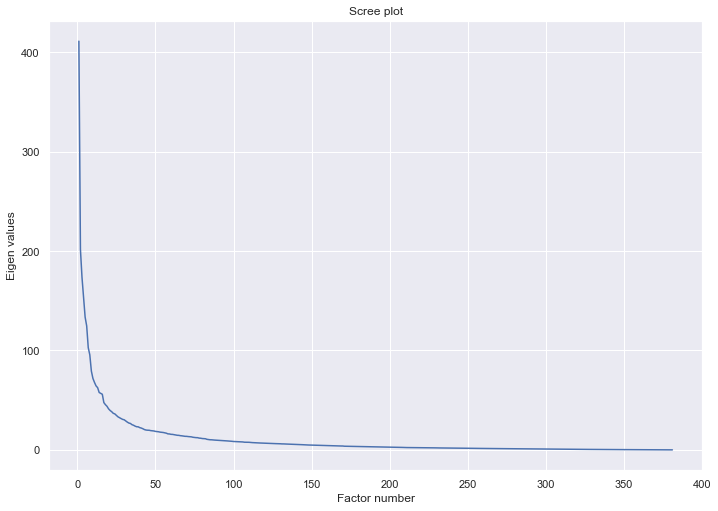

[[0.         1.0086358  1.01488242 ... 1.0156516  1.01701601 1.01300993]
 [1.0086358  0.         0.9497181  ... 0.95750027 0.96264431 1.0011715 ]
 [1.01488242 0.9497181  0.         ... 0.9030466  0.913987   0.99939528]
 ...
 [1.0156516  0.95750027 0.9030466  ... 0.         0.9276595  1.00156099]
 [1.01701601 0.96264431 0.913987   ... 0.9276595  0.         0.97136824]
 [1.01300993 1.0011715  0.99939528 ... 1.00156099 0.97136824 0.        ]]


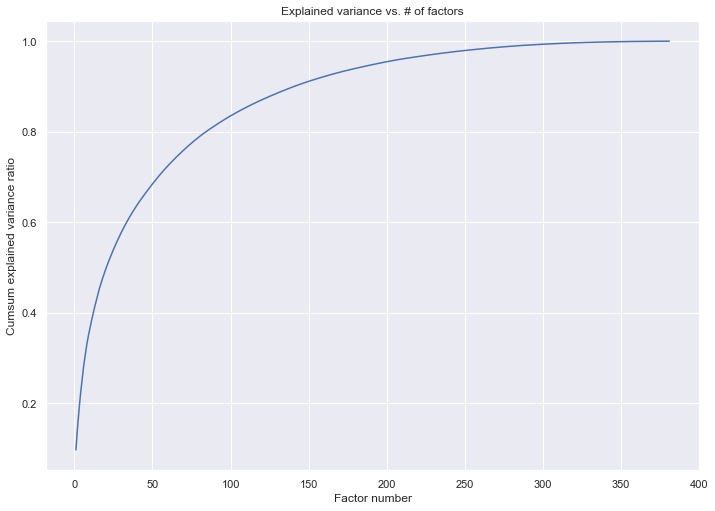

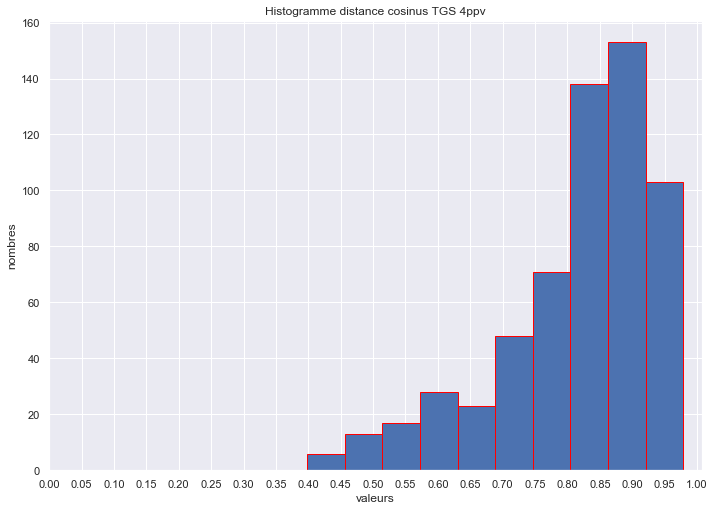

[t-SNE] Computing 61 nearest neighbors...
[t-SNE] Indexed 150 samples in 0.000s...
[t-SNE] Computed neighbors for 150 samples in 0.001s...
[t-SNE] Computed conditional probabilities for sample 150 / 150
[t-SNE] Mean sigma: 0.182240
[t-SNE] Computed conditional probabilities in 0.005s
[t-SNE] Iteration 50: error = 60.5550270, gradient norm = 0.4195348 (50 iterations in 0.033s)
[t-SNE] Iteration 100: error = 61.5687904, gradient norm = 0.5195461 (50 iterations in 0.036s)
[t-SNE] Iteration 150: error = 59.9122581, gradient norm = 0.3932294 (50 iterations in 0.036s)
[t-SNE] Iteration 200: error = 56.9985847, gradient norm = 0.4455391 (50 iterations in 0.033s)
[t-SNE] Iteration 250: error = 58.7569695, gradient norm = 0.1424304 (50 iterations in 0.033s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 58.756969
[t-SNE] Iteration 300: error = 0.8700054, gradient norm = 0.0186766 (50 iterations in 0.029s)
[t-SNE] Iteration 350: error = 0.8387430, gradient norm = 0.0013815 (

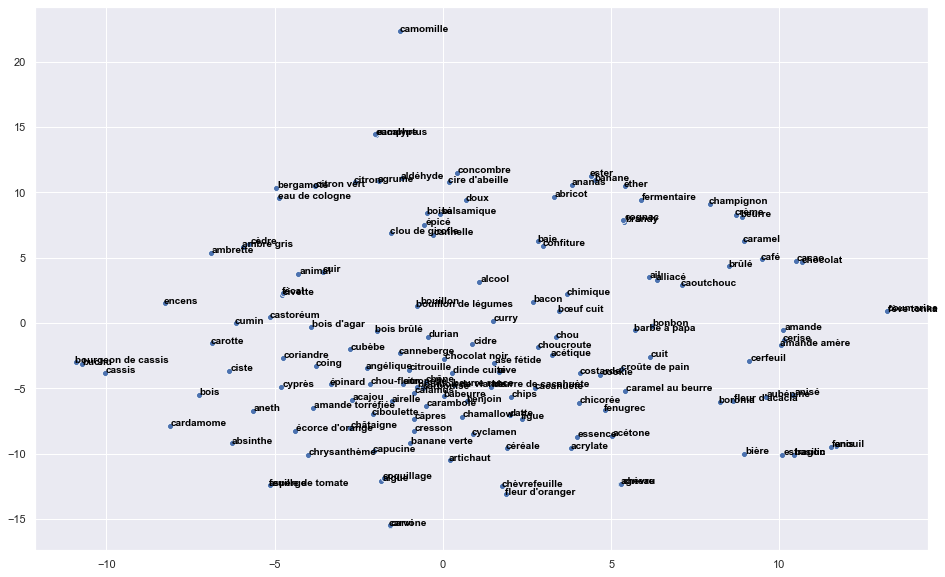

In [60]:
from sklearn.decomposition import PCA
#instanciation
acp = PCA(svd_solver='full')
mb2 = [0,0.05,0.1,0.15,0.20,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9,0.95,1,1.05,
      1.1,1.15,1.2,1.25,1.3,1.35,1.4,1.45,1.5,1.55,1.6,1.65,1.7,1.75,1.8,1.85,1.9,1.95,2]
#calculs
coord = acp.fit_transform(Z)
#nombre de composantes calculées
#print(acp.n_components_) # 381

#variance expliquée
print("variance expliquer en fonction de l'axe")
#print(acp.explained_variance_)

#valeur corrigée de la variance expliquée
eigval = (p-1)/p*acp.explained_variance_
print("Eig val = ")
#print(eigval)

#proportion de variance expliquée
print(acp.explained_variance_ratio_)
import matplotlib.pyplot as plt
import numpy
plt.plot(numpy.arange(1,n+1),eigval)
plt.title("Scree plot")
plt.ylabel("Eigen values")
plt.xlabel("Factor number")
plt.show()

sns.set(rc={'figure.figsize':(11.7,8.27)})
palette = sns.color_palette("bright", 10)

embed_mat = coord[:150]
embed_mat_cosine = cosine_distances(embed_mat)
print(embed_mat_cosine)

#cumul de variance expliquée
plt.plot(numpy.arange(1,n+1),numpy.cumsum(acp.explained_variance_ratio_))
plt.title("Explained variance vs. # of factors")
plt.ylabel("Cumsum explained variance ratio")
plt.xlabel("Factor number")
plt.show()

kppv_distance = np.empty([600],dtype=float)
index=0
for row in embed_mat_cosine:
    t = np.array(row)
    indices = t.argsort()
    indices = indices[t[indices] > 0]
    kppv_distance[index] = t[indices[0]]
    index+=1
    kppv_distance[index] = t[indices[1]]
    index+=1
    kppv_distance[index] = t[indices[2]]
    index+=1
    kppv_distance[index] = t[indices[3]]
    index+=1
    
plt.hist(kppv_distance,edgecolor = 'red')
plt.xlabel('valeurs')
plt.ylabel('nombres')
plt.xticks(mb1)
plt.title('Histogramme distance cosinus TGS 4ppv')
plt.savefig('figsize_test1.png',dpi=100)
plt.show()

tsne = TSNE(n_components=2,metric='precomputed',verbose=2,n_iter=2000,perplexity=20,early_exaggeration = 12,learning_rate=10)
X_embedded = tsne.fit_transform(embed_mat_cosine)


df_subset = {} 
df_subset['tsne-2d-one'] = X_embedded[:,0]
df_subset['tsne-2d-two'] = X_embedded[:,1]
plt.figure(figsize=(16,10))
p1 = sns.scatterplot(X_embedded[:,0], X_embedded[:,1], legend='full', palette=palette)
index = 0
for line in range(0,embed_mat_cosine.shape[0]):
    if index%2 == 0:
        decalage = 0.03
    else:
        decalage = -0.03
    p1.text(df_subset['tsne-2d-one'][line]+decalage, df_subset['tsne-2d-two'][line]+decalage, 
     headerText[line], horizontalalignment='left', size='small', color='black', weight='semibold')
    index+=1


# Application de l'ACP sur le jeu de données d'Oniris

(54, 70)
70
(54, 54)


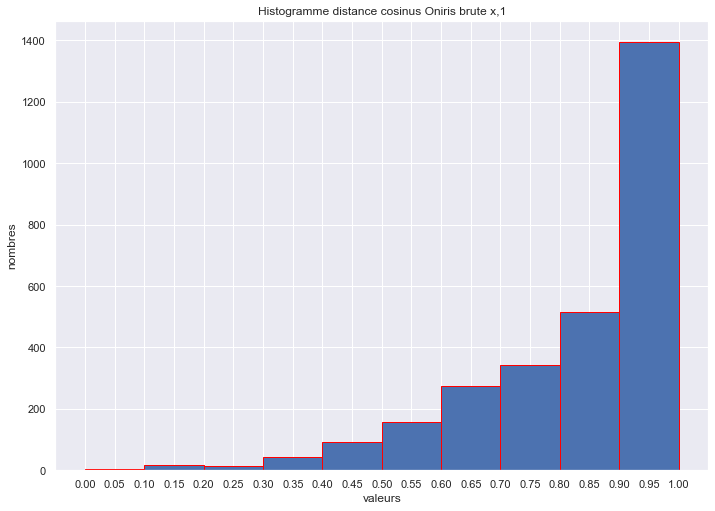

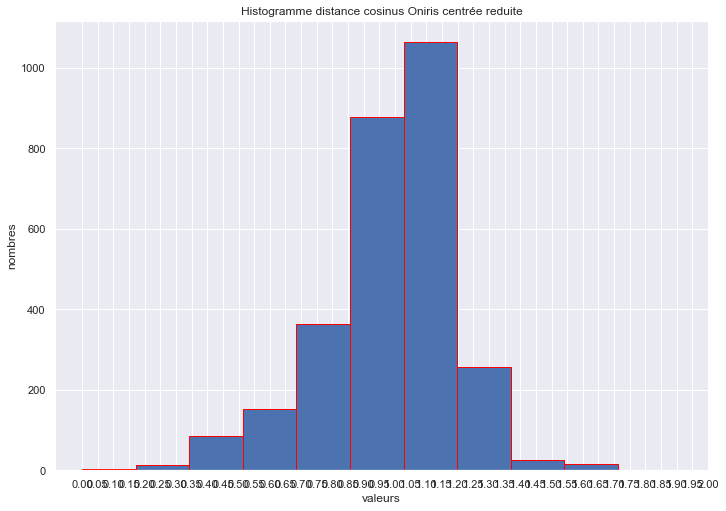

(54, 54)


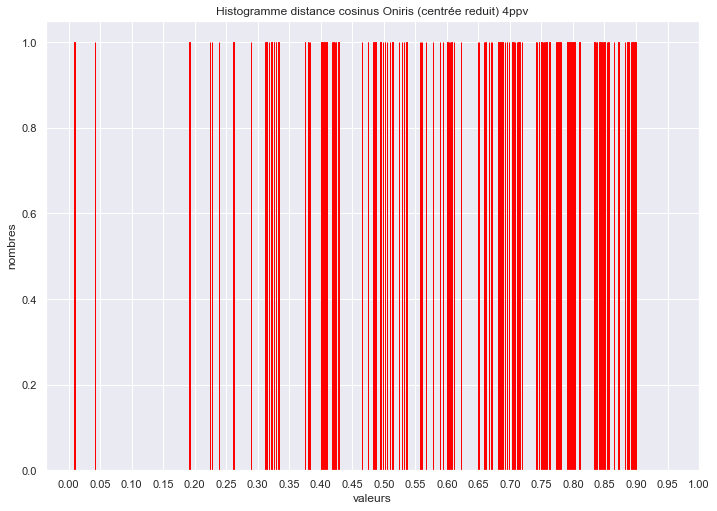

54
variance expliquer en fonction de l'axe
[1.44473413e+01 1.02032185e+01 5.50578712e+00 4.17236079e+00
 3.41852649e+00 3.21572026e+00 2.29455195e+00 2.01918298e+00
 1.98924949e+00 1.87775731e+00 1.82010151e+00 1.72123013e+00
 1.63865500e+00 1.42454497e+00 1.38600227e+00 1.30457203e+00
 1.20830854e+00 1.13054200e+00 1.04160496e+00 9.95584791e-01
 8.99042329e-01 8.00795407e-01 7.96513315e-01 7.76839164e-01
 6.44503093e-01 6.30282096e-01 5.34157623e-01 4.44521877e-01
 4.31365538e-01 3.63768431e-01 3.43224842e-01 2.82397234e-01
 2.68003465e-01 2.32090255e-01 1.95737358e-01 1.59521795e-01
 1.48411520e-01 1.15948188e-01 9.79070551e-02 7.59930529e-02
 6.57977935e-02 4.44939350e-02 3.59038657e-02 3.08994427e-02
 2.73638435e-02 2.20952152e-02 1.51727002e-02 1.23500426e-02
 1.08119140e-02 2.84923568e-30 1.57948349e-31 1.27104966e-31
 8.26754579e-32 4.35214179e-32]
Eig val = 
(54,)
[2.02568542e-01 1.43061000e-01 7.71975442e-02 5.85013550e-02
 4.79317206e-02 4.50881412e-02 3.21722892e-02 2.831129

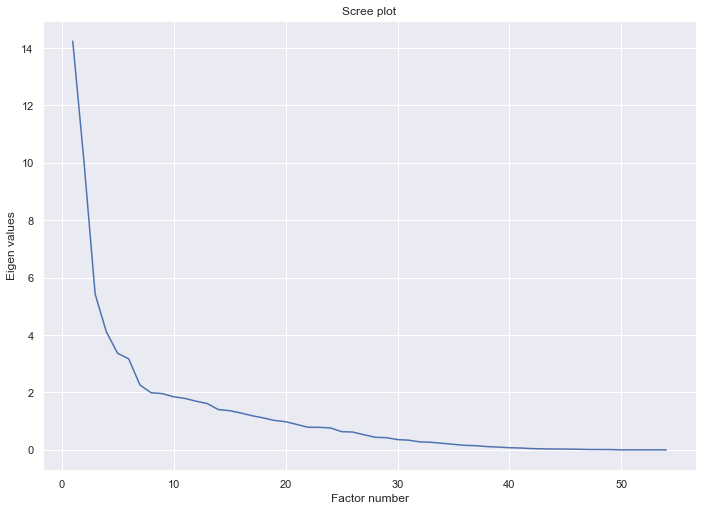

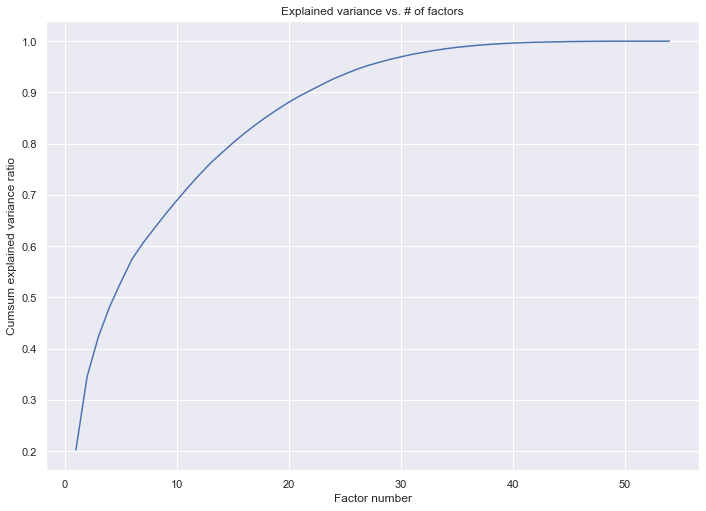

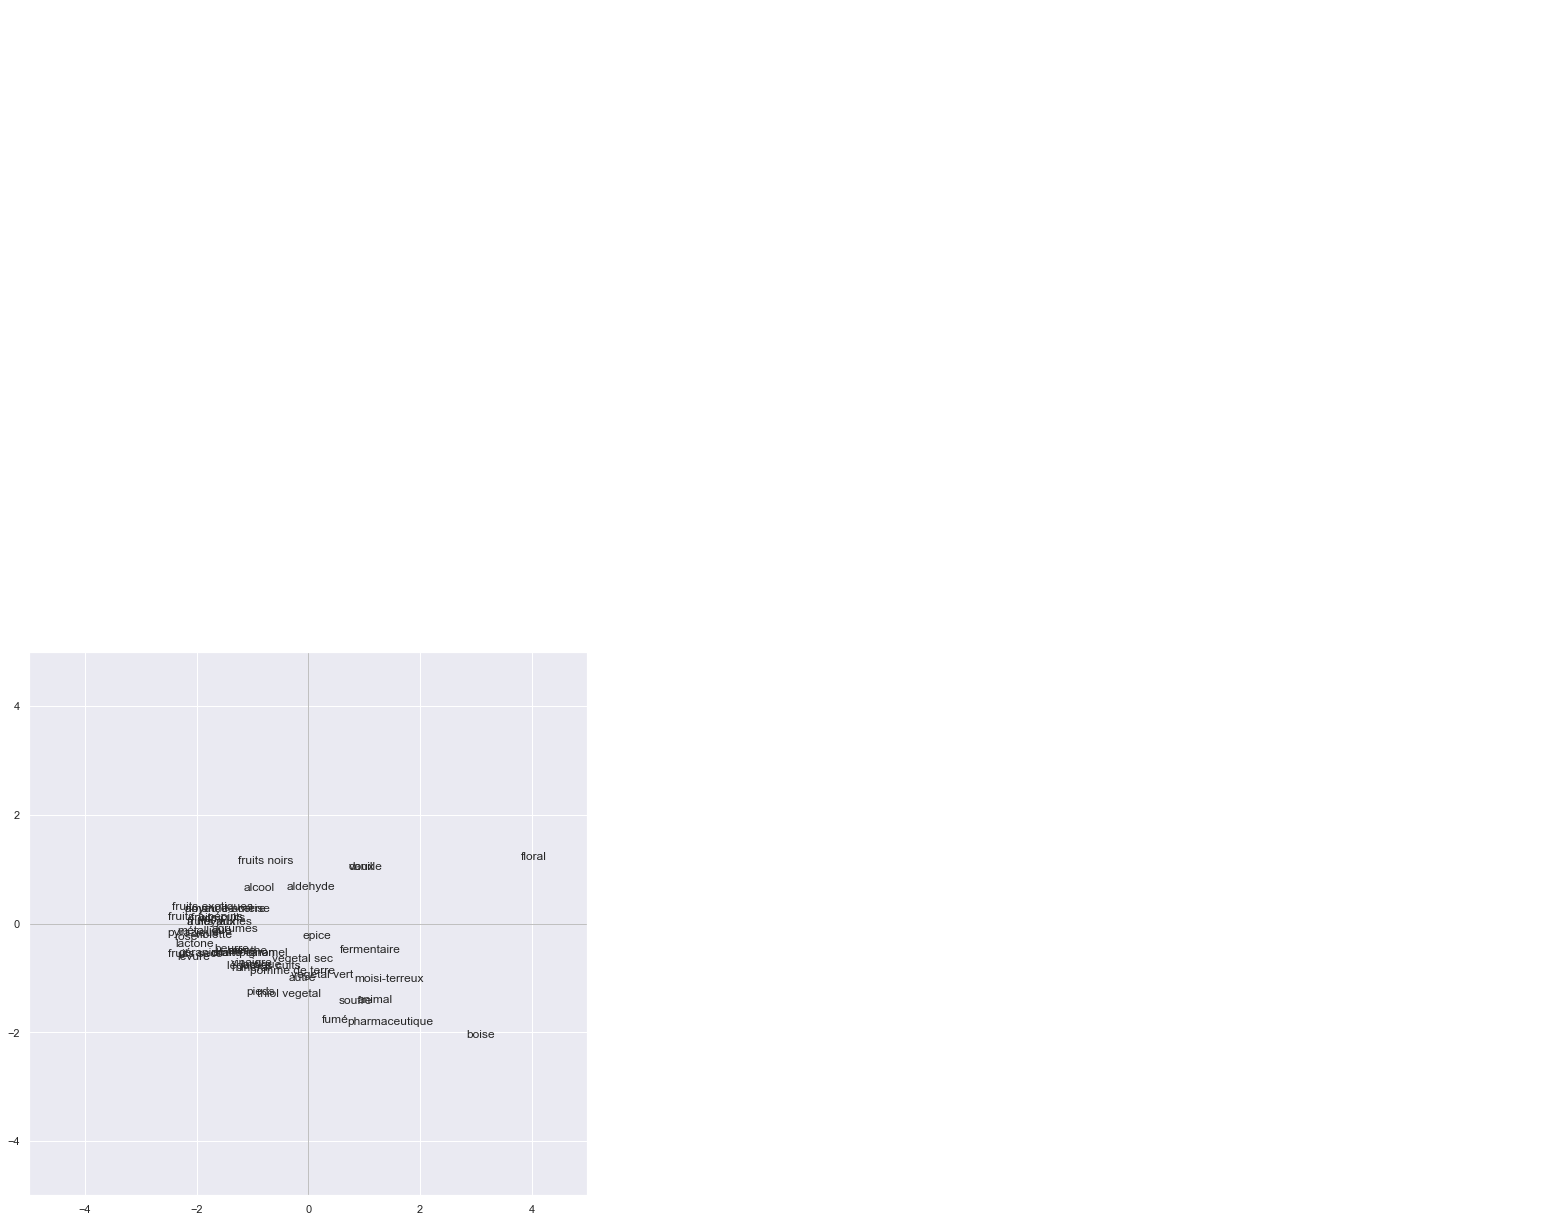

In [43]:
from sklearn.metrics.pairwise import cosine_distances
import pandas
from sklearn.manifold import TSNE
import seaborn as sns
import numpy as np

X = pandas.read_csv("dataOniris.csv",header=0,index_col=0)
X = X.T
mb1 = [0,0.05,0.1,0.15,0.20,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9,0.95,1]
mb2 = [0,0.05,0.1,0.15,0.20,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9,0.95,1,1.05,
      1.1,1.15,1.2,1.25,1.3,1.35,1.4,1.45,1.5,1.55,1.6,1.65,1.7,1.75,1.8,1.85,1.9,1.95,2]
#dimension
print(X.shape) # (70, 54)
#nombre d'observations
n = X.shape[0]
#nombre de variables
p = X.shape[1]
print(p)

cosine_distance_matrix = cosine_distances(X)
print(cosine_distance_matrix.shape)
index_matrice_distance = 0
matrice_distance = np.empty([2916],dtype=float)
for row in cosine_distances(X):
    for index in row:
        matrice_distance[index_matrice_distance] = index
        index_matrice_distance+=1
        
index=0
matrice_distance_without_0 = list(matrice_distance)
matrice_distance_without_0.remove(0)
for val in matrice_distance_without_0:
    if(val == 0):
        matrice_distance_without_0.pop(index)
    index+=1
    
    
plt.hist(matrice_distance_without_0,
            edgecolor = 'red')
plt.xlabel('valeurs')
plt.ylabel('nombres')
plt.xticks(mb1)
plt.title('Histogramme distance cosinus Oniris brute x,1')
plt.show()

import sklearn

#classe pour standardisation
from sklearn.preprocessing import StandardScaler
#instanciation
sc = StandardScaler()
#transformation – centrage-réduction
Z = sc.fit_transform(X)
dist_Cosine = cosine_distances(Z)
index_matrice_distance = 0
matrice_distance_reduite = np.empty([2916],dtype=float)
for row in dist_Cosine:
    for index in row:
        matrice_distance_reduite[index_matrice_distance] = index
        index_matrice_distance+=1
        
index=0
matrice_distance_reduite_without_0 = list(matrice_distance_reduite)
for val in matrice_distance_reduite_without_0:
    if(val == 0):
        matrice_distance_reduite_without_0.pop(index)
    index+=1
plt.hist(np.trim_zeros(matrice_distance_reduite_without_0),
            edgecolor = 'red')
plt.xlabel('valeurs')
plt.ylabel('nombres')
plt.xticks(mb2)
plt.title('Histogramme distance cosinus Oniris centrée reduite')
plt.show()

kppv_distance = np.empty([216,1],dtype=float)
index=0
print(dist_Cosine.shape)
for row in dist_Cosine:
    t = np.array(row)
    indices = t.argsort()
    indices = indices[t[indices] > 0]
    kppv_distance[index] = t[indices[0]]
    index+=1
    kppv_distance[index] = t[indices[1]]
    index+=1
    kppv_distance[index] = t[indices[2]]
    index+=1
    kppv_distance[index] = t[indices[3]]
    index+=1

index=0
kppv_distance_without_0 = list(kppv_distance)
for val in kppv_distance_without_0:
    if(val == 0):
        kppv_distance_without_0.pop(index)
    index+=1
plt.hist(kppv_distance_without_0,edgecolor = 'red')
plt.xlabel('valeurs')
plt.ylabel('nombres')
plt.xticks(mb1)
plt.title('Histogramme distance cosinus Oniris (centrée reduit) 4ppv')
plt.show()

#classe pour l'ACP
from sklearn.decomposition import PCA
#instanciation
acp = PCA(svd_solver='full')

#calculs
coord = acp.fit_transform(Z)
#nombre de composantes calculées
print(acp.n_components_) # 70

#variance expliquée
print("variance expliquer en fonction de l'axe")
print(acp.explained_variance_)

#valeur corrigée de la variance expliquée
eigval = (p-1)/p*acp.explained_variance_
print("Eig val = ")
print(eigval.shape)

#proportion de variance expliquée
print(acp.explained_variance_ratio_)
import matplotlib.pyplot as plt
import numpy
plt.plot(numpy.arange(1,n+1),eigval)
plt.title("Scree plot")
plt.ylabel("Eigen values")
plt.xlabel("Factor number")
plt.show()


#cumul de variance expliquée
plt.plot(numpy.arange(1,n+1),numpy.cumsum(acp.explained_variance_ratio_))
plt.title("Explained variance vs. # of factors")
plt.ylabel("Cumsum explained variance ratio")
plt.xlabel("Factor number")
plt.show()


#positionnement des individus dans le premier plan
fig, axes = plt.subplots(figsize=(10,10))
axes.set_xlim(-5,5) #même limites en abscisse
axes.set_ylim(-5,5) #et en ordonnée
#placement des étiquettes des observations
for i in range(n):
    plt.annotate(X.index[i],(coord[i,0],coord[i,1]))
#ajouter les axes
plt.plot([-6,6],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-6,6],color='silver',linestyle='-',linewidth=1)
#affichage
plt.show()


AttributeError: 'numpy.ndarray' object has no attribute 'describe'

(54, 70)
variance expliquer en fonction de l'axe
Eig val = 
[2.02568542e-01 1.43061000e-01 7.71975442e-02 5.85013550e-02
 4.79317206e-02 4.50881412e-02 3.21722892e-02 2.83112958e-02
 2.78915934e-02 2.63283432e-02 2.55199418e-02 2.41336500e-02
 2.29758506e-02 1.99737786e-02 1.94333651e-02 1.82916183e-02
 1.69418923e-02 1.58515148e-02 1.46045139e-02 1.39592577e-02
 1.26056200e-02 1.12280838e-02 1.11680438e-02 1.08921893e-02
 9.03668358e-03 8.83728864e-03 7.48951165e-03 6.23271414e-03
 6.04824696e-03 5.10045684e-03 4.81241181e-03 3.95953794e-03
 3.75772054e-03 3.25417553e-03 2.74446560e-03 2.23668125e-03
 2.08090226e-03 1.62572856e-03 1.37277088e-03 1.06551106e-03
 9.22561655e-04 6.23856761e-04 5.03413990e-04 4.33246155e-04
 3.83672939e-04 3.09800636e-04 2.12738918e-04 1.73161973e-04
 1.51595619e-04 3.99496008e-32 2.21461971e-33 1.78215957e-33
 1.15920616e-33 6.10220938e-34]


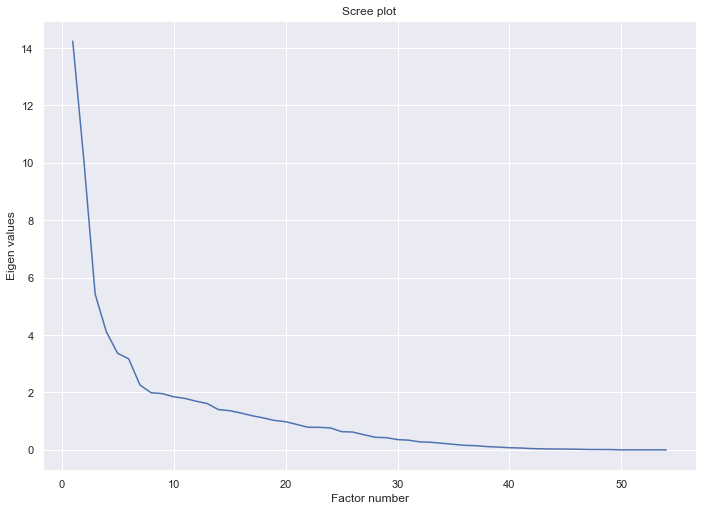

[[0.         0.8783607  1.01075168 1.05079899 0.5994304  1.07959555
  1.19585283 0.75003276 0.83183232 0.93218134 1.271382   0.8402851
  0.9468864  1.29135001 1.24081325 1.10784579 1.23399774 1.01689604
  1.25058259 1.1951138 ]
 [0.8783607  0.         1.08113042 1.00908683 0.64885243 1.03138136
  1.17545582 0.40478718 0.99849468 0.83348801 1.25024379 0.63826961
  0.90957573 0.93653936 1.20034586 0.92154672 1.19431296 1.11870225
  1.16614182 1.24703822]
 [1.01075168 1.08113042 0.         0.55762642 1.03827991 1.00913721
  1.15225143 1.11069506 0.79462387 1.05515714 1.04712964 1.09847705
  1.06744657 0.76484999 1.05735699 1.11187206 1.23214481 1.05251081
  1.00707423 0.93687447]
 [1.05079899 1.00908683 0.55762642 0.         1.06714318 0.99621562
  1.10329733 0.97416146 0.86682009 1.00298516 1.00880886 1.02435637
  1.07610336 0.98865044 1.03778606 1.02652359 1.14451493 1.06246823
  1.11099229 1.08689143]
 [0.5994304  0.64885243 1.03827991 1.06714318 0.         0.93603651
  1.04903481 0.63

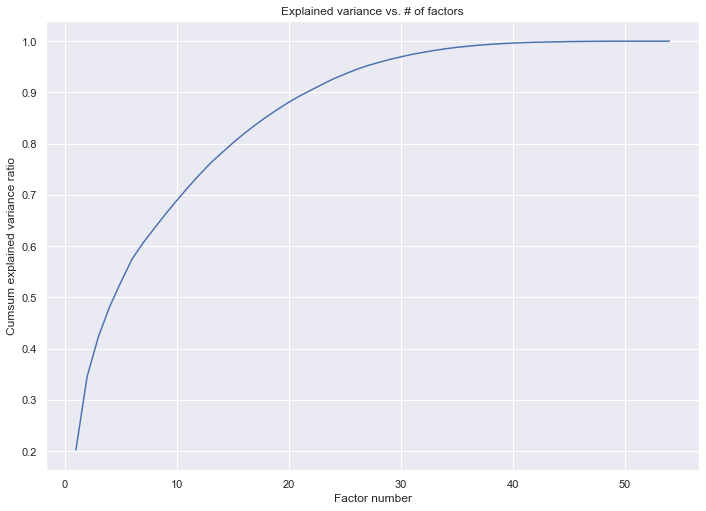

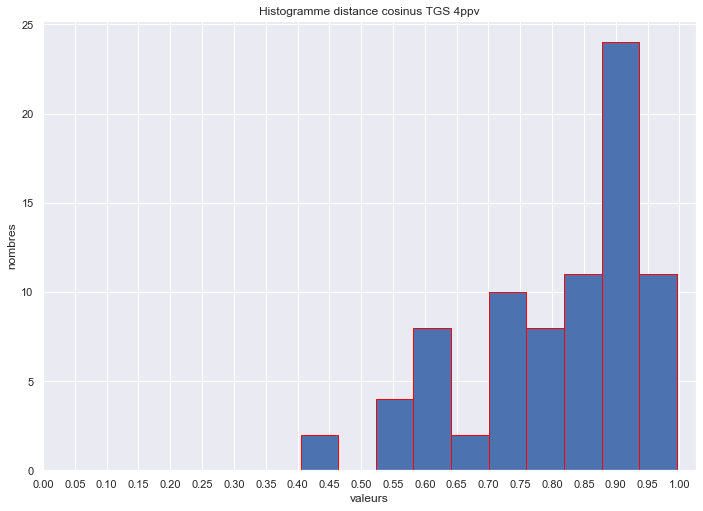

[t-SNE] Computing 7 nearest neighbors...
[t-SNE] Indexed 20 samples in 0.000s...
[t-SNE] Computed neighbors for 20 samples in 0.000s...
[t-SNE] Computed conditional probabilities for sample 20 / 20
[t-SNE] Mean sigma: 0.166532
[t-SNE] Computed conditional probabilities in 0.001s
[t-SNE] Iteration 50: error = 59.6879196, gradient norm = 2.2918682 (50 iterations in 0.007s)
[t-SNE] Iteration 100: error = 62.9704933, gradient norm = 1.8902485 (50 iterations in 0.006s)
[t-SNE] Iteration 150: error = 61.3763809, gradient norm = 2.6698976 (50 iterations in 0.006s)
[t-SNE] Iteration 200: error = 65.8777695, gradient norm = 2.0378973 (50 iterations in 0.006s)
[t-SNE] Iteration 250: error = 58.8737030, gradient norm = 2.4188125 (50 iterations in 0.005s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 58.873703
[t-SNE] Iteration 300: error = 0.5574089, gradient norm = 0.0427746 (50 iterations in 0.006s)
[t-SNE] Iteration 350: error = 0.4204957, gradient norm = 0.0084151 (50 it

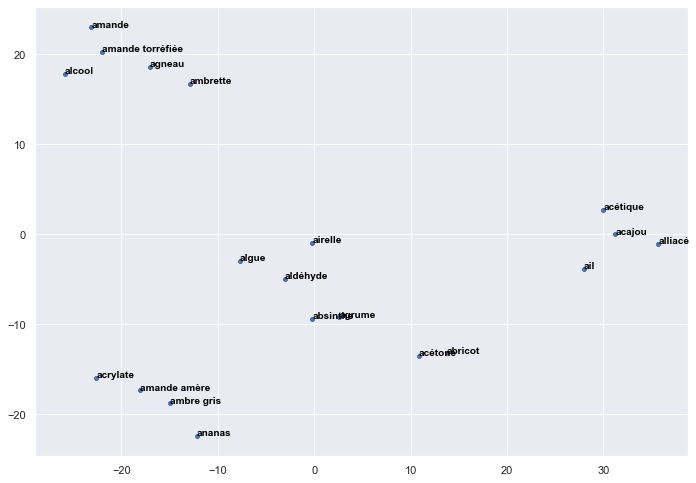

In [71]:
from sklearn.metrics.pairwise import cosine_distances
import pandas
from sklearn.manifold import TSNE
import seaborn as sns
import numpy as np

X = pandas.read_csv("dataOniris.csv",header=0,index_col=0)
X = X.T
from sklearn.preprocessing import StandardScaler
#instanciation
sc = StandardScaler()
#transformation – centrage-réduction
Z = sc.fit_transform(X)
from sklearn.decomposition import PCA
#instanciation
acp = PCA(svd_solver='full')
n = X.shape[0]
print(X.shape)
#nombre de variables
p = X.shape[1]
#calculs
coord = acp.fit_transform(Z)
#nombre de composantes calculées
#print(acp.n_components_) # 381

#variance expliquée
print("variance expliquer en fonction de l'axe")
#print(acp.explained_variance_)

#valeur corrigée de la variance expliquée
eigval = (p-1)/p*acp.explained_variance_
print("Eig val = ")
#print(eigval)

#proportion de variance expliquée
print(acp.explained_variance_ratio_)
import matplotlib.pyplot as plt
import numpy
plt.plot(numpy.arange(1,n+1),eigval)
plt.title("Scree plot")
plt.ylabel("Eigen values")
plt.xlabel("Factor number")
plt.show()

sns.set(rc={'figure.figsize':(11.7,8.27)})
palette = sns.color_palette("bright", 10)

embed_mat = coord[:20]
embed_mat_cosine = cosine_distances(embed_mat)
print(embed_mat_cosine)

#cumul de variance expliquée
plt.plot(numpy.arange(1,n+1),numpy.cumsum(acp.explained_variance_ratio_))
plt.title("Explained variance vs. # of factors")
plt.ylabel("Cumsum explained variance ratio")
plt.xlabel("Factor number")
plt.show()

kppv_distance = np.empty([80],dtype=float)
index=0
for row in embed_mat_cosine:
    t = np.array(row)
    indices = t.argsort()
    indices = indices[t[indices] > 0]
    kppv_distance[index] = t[indices[0]]
    index+=1
    kppv_distance[index] = t[indices[1]]
    index+=1
    kppv_distance[index] = t[indices[2]]
    index+=1
    kppv_distance[index] = t[indices[3]]
    index+=1
    
plt.hist(kppv_distance,edgecolor = 'red')
plt.xlabel('valeurs')
plt.ylabel('nombres')
plt.xticks(mb1)
plt.title('Histogramme distance cosinus TGS 4ppv')
plt.savefig('figsize_test1.png',dpi=100)
plt.show()

tsne = TSNE(n_components=2,metric='precomputed',verbose=2,n_iter=1000,perplexity=2,early_exaggeration = 12,learning_rate=10)
X_embedded = tsne.fit_transform(embed_mat_cosine)


df_subset = {} 
df_subset['tsne-2d-one'] = X_embedded[:,0]
df_subset['tsne-2d-two'] = X_embedded[:,1]
p1 = sns.scatterplot(X_embedded[:,0], X_embedded[:,1], legend='full', palette=palette)
index = 0
for line in range(0,embed_mat_cosine.shape[0]):
    p1.text(df_subset['tsne-2d-one'][line], df_subset['tsne-2d-two'][line], 
     headerText[line], horizontalalignment='left', size='small', color='black', weight='semibold')
    index+=1

